In [9]:
from Libraries.Util import Metr
from Libraries.features import CEmbDim

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

%matplotlib inline

plt.style.use('ggplot')

In [2]:
data_stock = pd.read_csv('zeus.us.txt')['Close'].values
data_energy = pd.read_csv('energy_data.csv').iloc[:,0].values

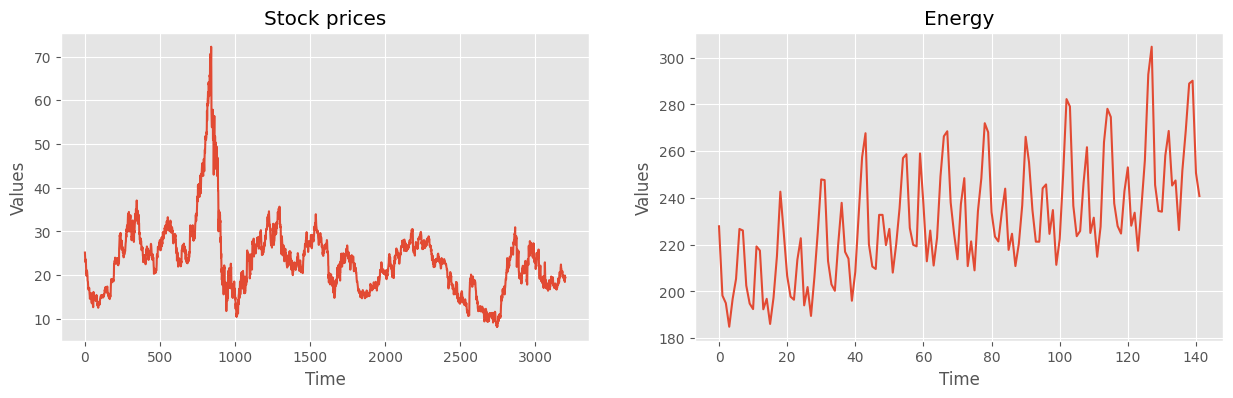

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4), dpi=100)

axs[0].plot(data_stock)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Values')
axs[0].set_title('Stock prices')

axs[1].plot(data_energy)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Values')
axs[1].set_title('Energy')

plt.subplots_adjust(wspace=0.2)
plt.show()

In [4]:
def forecast(data: np.array, h: int, m: int) -> np.array:
    z0 = data[-m:]
    z = [data[i : i+m] for i in range(len(data) - (m + h + 1), 0, -1)]
    
    max_idx = len(data) - (m + h + 1) - np.argmax(list(map(lambda x: np.cov(z0, x)[0, 1]/(np.std(x) * np.std(z0)), np.array(z))))
    zk = data[max_idx: max_idx + m].reshape(-1, 1)
    zk = np.hstack([zk, np.ones(m).reshape(-1, 1)])
    
    coef = np.matmul(np.matmul(zk.T, z0.reshape(-1, 1)).T, np.linalg.inv(np.matmul(zk.T, zk)))[0]
    
    return data[max_idx + m : max_idx + m + h] * coef[0] + coef[-1]

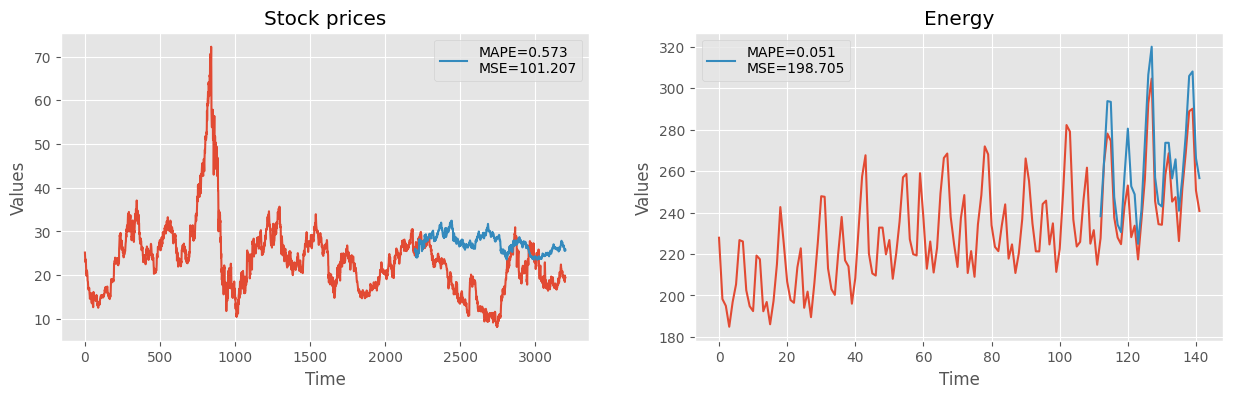

In [34]:
data_stock_pred = forecast(data_stock[:-1000], h=1000, m=13)
data_energy_pred = forecast(data_energy[:-30], h=30, m=6)

fig, axs = plt.subplots(1, 2, figsize=(15, 4), dpi=100)

axs[0].plot(np.arange(len(data_stock)), data_stock)
axs[0].plot(np.arange(len(data_stock_pred))+len(data_stock[:-1000]), data_stock_pred,\
    label=f'MAPE={round(mean_absolute_percentage_error(data_stock[-1000:], data_stock_pred),3)}\nMSE={round(mean_squared_error(data_stock[-1000:], data_stock_pred), 3)}')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Values')
axs[0].set_title('Stock prices')
axs[0].legend()

axs[1].plot(np.arange(len(data_energy)), data_energy)
axs[1].plot(np.arange(len(data_energy_pred))+len(data_energy[:-30]), data_energy_pred, \
    label=f'MAPE={round(mean_absolute_percentage_error(data_energy[-30:], data_energy_pred), 3)}\nMSE={round(mean_squared_error(data_energy[-30:], data_energy_pred), 3)}')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Values')
axs[1].set_title('Energy')
axs[1].legend()

plt.subplots_adjust(wspace=0.2)
plt.show()